# Analyze Samples
## Imports

In [ ]:
import sys
sys.path.append('/home/jovyan/work/workspace')

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np

from tlib import tlearn, tgeo, tutils
from projects.testbed18 import config, utils

from api_coverages import get_coverage

%load_ext autoreload
%autoreload 2

## Configuration

In [2]:
# analyze sample from file ('from_file') or from api ('from_api')
data_source = 'from_api'

In [3]:
# Configuration for API

collection = 's2'

#bbox = [16.7, 59.7, 16.825, 59.825] # -> 1250 x 1250 pixels
#bbox = [16.8, 59.8, 16.8251, 59.825] # -> 250 x 250 pixels
#bbox = [20.27080771398277, 66.45825882626778, 20.495119661234394, 66.55002311657806] # paper figure 8
#bbox = [10.434810477469897, 62.019114499434934, 10.836427562826682, 62.1989645072601] # paper figure 9 (2017)
#bbox = [10.434810477469897, 62.019114499434934, 10.836427562826682, 62.1989645072601] # paper figure 9 (2020)
#bbox = [26.12659400833689, 65.34754243953564, 26.341300676504012, 65.43979470854401] # paper figure 10
bbox = [20.27, 66.45, 20.39, 66.57]

bands = None  # e.g.'blue, green, red'

In [4]:
# Configuration for file
#file_name = 'investigative/inv_hydroelectric-letsi_2019-07-01-2019-08-30.tif'
file_name = 'samples/s2_investigative_20.37_66.5_20.39_66.52.tif'
file_name = os.path.join(config.data_folder, file_name)

In [5]:
# ToDo: add in pygeoapi_odc_provider
#channel_names = dataset.descriptions
#titles = ['blue', 'green', 'red', 'vegetation_red_edge1', 'vegetation_red_edge2', 'vegetation_red_edge3',
#          'nir', 'narrow_nir', 'swir1', 'swir2']

## Download data from API Coverages

In [6]:
if data_source == 'from_api':
    collection_url = config.server_url + 'collections/' + collection
    result = get_coverage(collection_url, bbox, bands)
    #dataset = result.open()
    #channel_names = dataset.descriptions
    #images = dataset.read()

Requesting coverage from 'https://18.testbed.dev.52north.org/geodatacube/collections/s2_investigative/coverage?f=GeoTIFF&bbox=20.27,66.45,20.39,66.57'


## Setup sample and plotter

In [7]:
if data_source == 'from_api':
    input_data = result
    s2_plotter = utils.GenericS2Plotter()
elif data_source == 'from_file':
    input_data = file_name
    channel_indices = {'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4, 'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9}
    s2_plotter = tgeo.s2.Plotter(folder_s2=os.path.join(config.data_folder_investigative), 
                                 channel_indices=channel_indices)
else:
    print("No valid data source specified!")

## Plot Sentinel-2 data

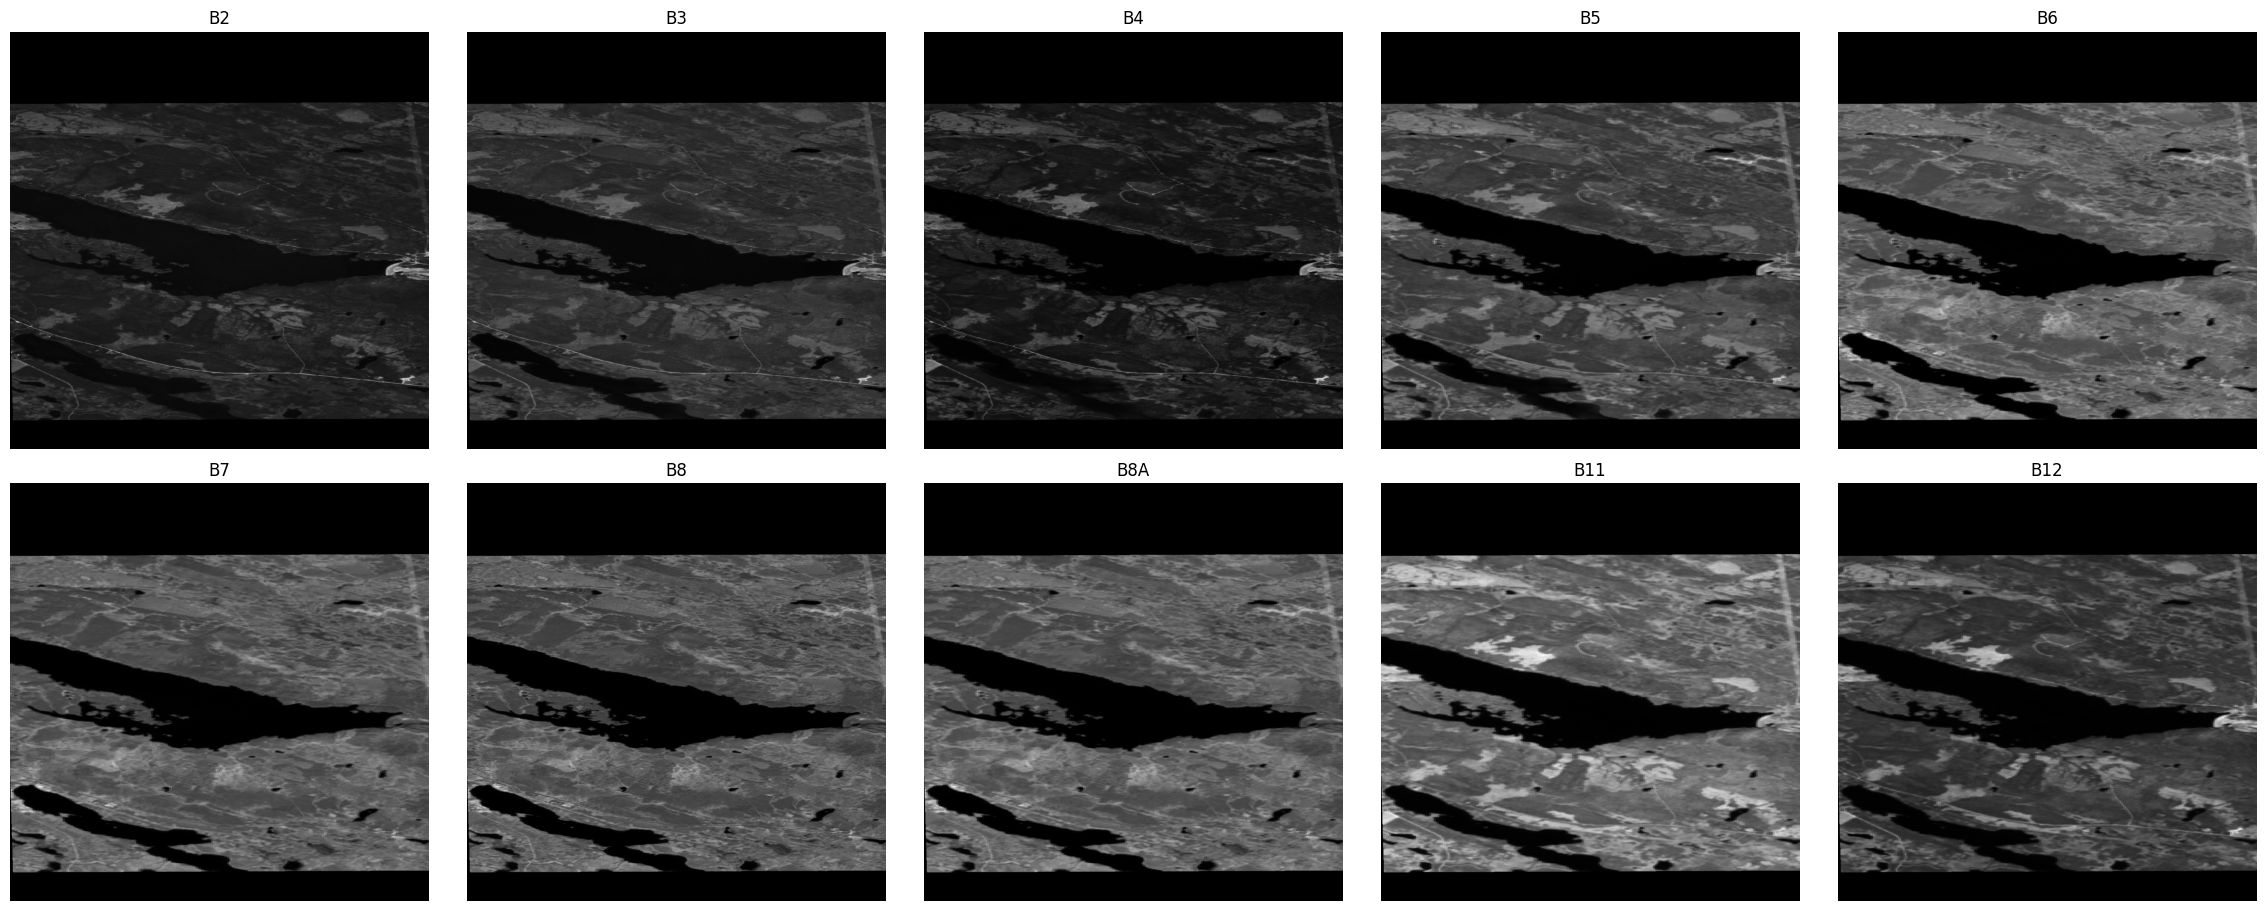

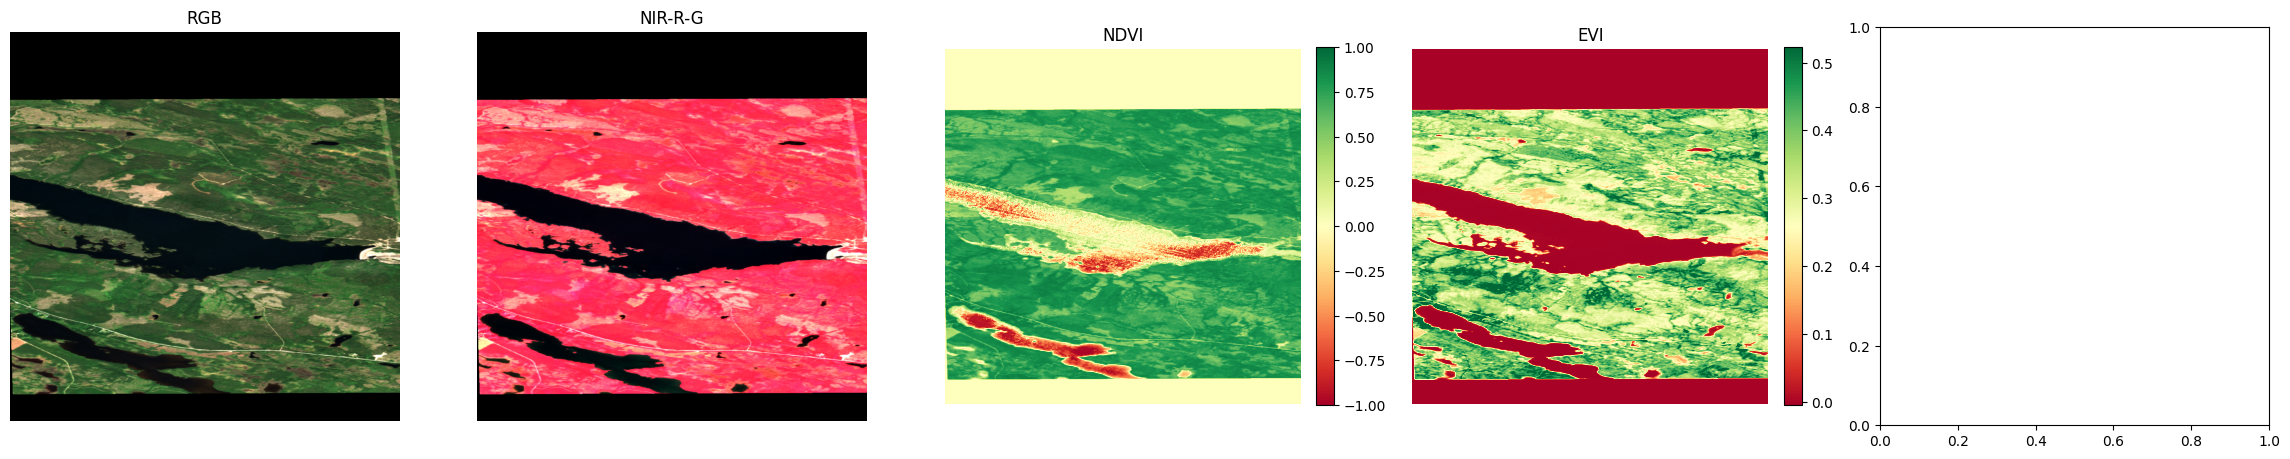

In [20]:
s2_plotter.plot(
    input_data,
    plot_s2=True,
    plot_s2_channels=True
)

## Predict activation map

In [13]:
unet_map = utils.predict_activation_maps(input_data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]


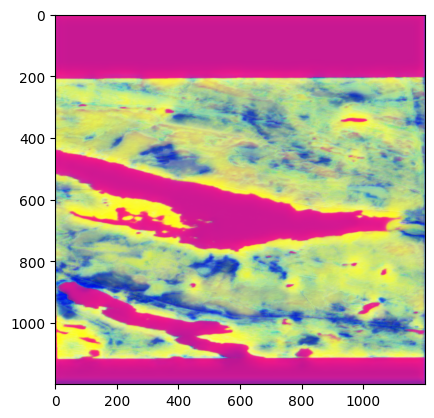

In [14]:
plt.imshow((np.array(unet_map)[0].transpose(1,2,0)+1)/2)

## Predict  sensitivity map

In [15]:
sensitivities = utils.predict_sensitivity_maps(input_data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.34s/it]


predicting groups:   0%|          | 0/981 [00:00<?, ?it/s]

predicting sensitivities:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
asos = utils.load_asos()

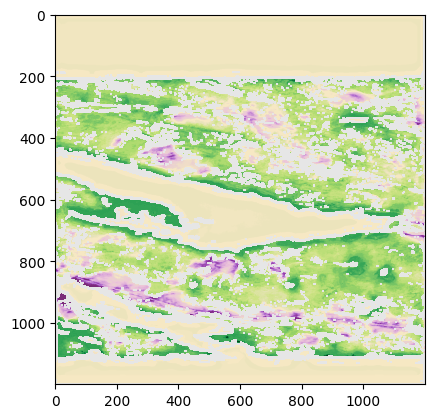

In [17]:
plt.imshow(sensitivities[0], cmap=asos.cmap, vmin=-asos.vlim, vmax=asos.vlim)

## All Files to RGB Tiff
Note: If you do not have a trained model, yet, you can ignore some of the plot_kwargs! To plot them, you need to predict the image.

In [ ]:
#output_folder = os.path.join(config.working_dir, 'rgbs')  # os.path.join(utils.load_trainer().log_dir, 'rgbs')

In [ ]:
## plotter
#s2_plotter.val_range_s2 = (0, 2**10.5)
#s2_plotter.to_tif(
#    *files,
#    output_folder=output_folder,
#    
#    plot_rgb=True,
#    #plot_false_colors=True,
#    #plot_channels=['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12'],
#    #plot_ndvi=True,
#    #plot_evi=True,
#    #plot_scl=True,
#    #plot_lcs=['CORINE', 'MODIS_1', 'CGLS', 'GlobCover'],  # ['CORINE', 'MODIS_1', 'CGLS', 'GlobCover']
#    #plot_masks=['BB'],#['ROI', 'Valid_Area'],  # ['ROI', 'Valid_Area']
#)
#
#asos_plotter.to_tif(
#    *files,
#    output_folder=output_folder,
#    
#    plot_unet_maps=True,
#    #plot_all_unet_maps=True,
#    plot_sensitivities=True,
#    #plot_osms=True,
#
#    batch_size=batch_size,
#)